In [10]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import pandas as pd

### The special thing about the time series is that the data points relate to one another..they are not independent

So we can compare them and relate them. One way to look at it is to see how they change over time. For example the difference in the time series

In [4]:
ts = pd.Series(np.random.randn(20)+10 , pd.date_range('7-1-16', freq = 'D'
                                                     ,periods = 20))

ts_lagged = ts.shift()  # lag

In [5]:
ts.head()

2016-07-01    9.951380
2016-07-02    8.768348
2016-07-03    9.629742
2016-07-04    9.788401
2016-07-05    9.239538
Freq: D, dtype: float64

In [7]:
ts_lagged.head()

2016-07-01         NaN
2016-07-02    9.951380
2016-07-03    8.768348
2016-07-04    9.629742
2016-07-05    9.788401
Freq: D, dtype: float64

In [8]:
ts.diff()

2016-07-01         NaN
2016-07-02   -1.183032
2016-07-03    0.861394
2016-07-04    0.158659
2016-07-05   -0.548864
2016-07-06    1.271375
2016-07-07    0.272615
2016-07-08   -0.785200
2016-07-09    0.930434
2016-07-10   -2.090046
2016-07-11    0.242537
2016-07-12    2.427069
2016-07-13    0.366551
2016-07-14   -1.023829
2016-07-15    0.126731
2016-07-16   -0.948405
2016-07-17    0.244272
2016-07-18    0.088789
2016-07-19    0.311795
2016-07-20   -0.862549
Freq: D, dtype: float64

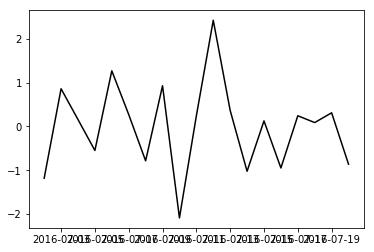

In [11]:
# Plotting the graph for the diff
plt.plot(ts.diff(), color = 'black')

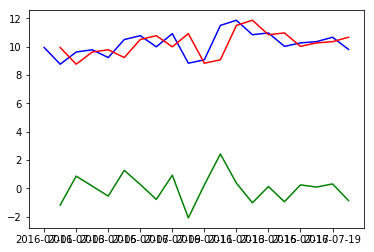

In [12]:
plt.plot(ts, color = 'blue')
plt.plot(ts_lagged, color = 'red')
plt.plot(ts  - ts_lagged, color = 'green')

In [13]:
# want to shit by an year:
ts_year_lagg = ts.shift(12)
ts

2016-07-01     9.951380
2016-07-02     8.768348
2016-07-03     9.629742
2016-07-04     9.788401
2016-07-05     9.239538
2016-07-06    10.510913
2016-07-07    10.783528
2016-07-08     9.998328
2016-07-09    10.928762
2016-07-10     8.838717
2016-07-11     9.081253
2016-07-12    11.508322
2016-07-13    11.874873
2016-07-14    10.851044
2016-07-15    10.977775
2016-07-16    10.029370
2016-07-17    10.273642
2016-07-18    10.362431
2016-07-19    10.674226
2016-07-20     9.811677
Freq: D, dtype: float64

In [14]:
ts_year_lagg

2016-07-01          NaN
2016-07-02          NaN
2016-07-03          NaN
2016-07-04          NaN
2016-07-05          NaN
2016-07-06          NaN
2016-07-07          NaN
2016-07-08          NaN
2016-07-09          NaN
2016-07-10          NaN
2016-07-11          NaN
2016-07-12          NaN
2016-07-13     9.951380
2016-07-14     8.768348
2016-07-15     9.629742
2016-07-16     9.788401
2016-07-17     9.239538
2016-07-18    10.510913
2016-07-19    10.783528
2016-07-20     9.998328
Freq: D, dtype: float64

In [15]:
ts.diff()

2016-07-01         NaN
2016-07-02   -1.183032
2016-07-03    0.861394
2016-07-04    0.158659
2016-07-05   -0.548864
2016-07-06    1.271375
2016-07-07    0.272615
2016-07-08   -0.785200
2016-07-09    0.930434
2016-07-10   -2.090046
2016-07-11    0.242537
2016-07-12    2.427069
2016-07-13    0.366551
2016-07-14   -1.023829
2016-07-15    0.126731
2016-07-16   -0.948405
2016-07-17    0.244272
2016-07-18    0.088789
2016-07-19    0.311795
2016-07-20   -0.862549
Freq: D, dtype: float64

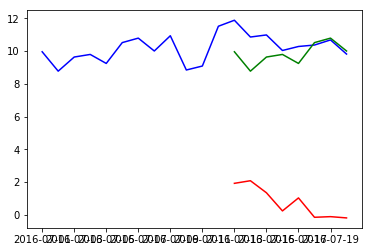

In [16]:
plt.plot(ts, color = 'blue')
plt.plot(ts_year_lagg, color = 'green')
plt.plot(ts- ts_year_lagg, color = 'red')

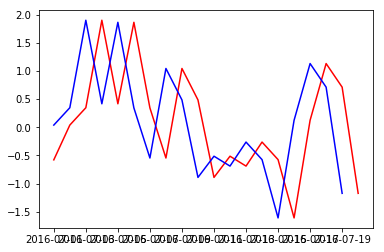

In [19]:
## To shift the time series into the future :
ts = pd.Series(np.random.randn(20), pd.date_range('7/1/16', freq = 'D',
              periods = 20))
ts_lagged = ts.shift(-1)  # future lags
plt.plot(ts,color = 'red')
plt.plot(ts_lagged, color = 'blue')

## Window functions for finding the moving average measures of the tme series

In [21]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])

In [22]:
df.head()

,A,B,C
2016-07-01 00:00:00,0.873082,-0.834122,-1.341443
2016-07-01 00:00:01,0.006103,0.487261,-1.655867
2016-07-01 00:00:02,-0.389774,-1.356491,0.066064
2016-07-01 00:00:03,-1.365263,-1.400360,2.505103
2016-07-01 00:00:04,-2.282934,0.642460,-0.719390


In [23]:
r = df.rolling(window = 20)
r

Rolling [window=20,center=False,axis=0]

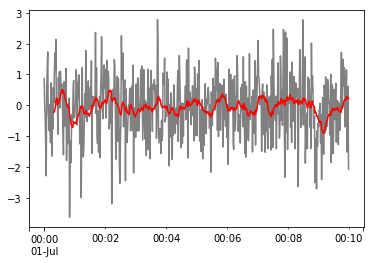

In [25]:
# plotting the mean of the time series variations / moving average
df['A'].plot(color = 'gray')
r.mean()['A'].plot(color = 'red')

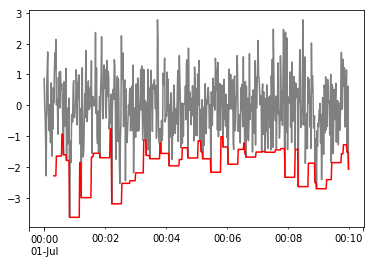

In [27]:
# plotting the min values of the time series
df['A'].plot(color = 'grey')
r.min()['A'].plot(color = 'red')

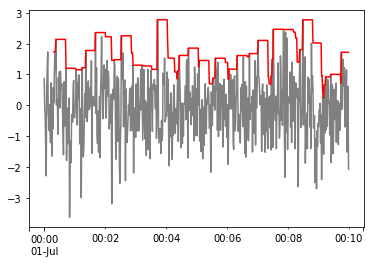

In [30]:
# plotting the agg values of the time series
df['A'].plot(color = 'grey')
r.max()['A'].plot(color = 'red')

In [36]:
r.count()[:10]

,A,B,C
2016-07-01 00:00:00,1.0,1.0,1.0
2016-07-01 00:00:01,2.0,2.0,2.0
2016-07-01 00:00:02,3.0,3.0,3.0
2016-07-01 00:00:03,4.0,4.0,4.0
2016-07-01 00:00:04,5.0,5.0,5.0
2016-07-01 00:00:05,6.0,6.0,6.0
2016-07-01 00:00:06,7.0,7.0,7.0
2016-07-01 00:00:07,8.0,8.0,8.0
2016-07-01 00:00:08,9.0,9.0,9.0
2016-07-01 00:00:09,10.0,10.0,10.0


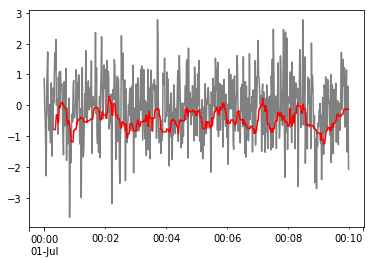

In [38]:
# plotting the 30% quantile range 
df['A'].plot(color = 'grey')
r.quantile(.30)['A'].plot(color = 'red')

## Creating a custom funciton

In [40]:
df.rolling(window = 10, center = False).apply(lambda x:x[1]/x[2])[10:20]

,A,B,C
2016-07-01 00:00:10,0.285494,0.968674,0.026372
2016-07-01 00:00:11,0.598030,-2.179685,-3.482258
2016-07-01 00:00:12,-3.994712,0.894235,0.315563
2016-07-01 00:00:13,0.471817,0.652762,-7.219175
2016-07-01 00:00:14,0.699601,-0.542609,0.665945
2016-07-01 00:00:15,-7.364507,1.826586,1.347927
2016-07-01 00:00:16,0.496879,-3.440692,1.254024
2016-07-01 00:00:17,0.576997,0.294942,-0.839659
2016-07-01 00:00:18,-41.314256,0.973533,-0.945491
2016-07-01 00:00:19,-0.016596,-1.113555,-1.618233


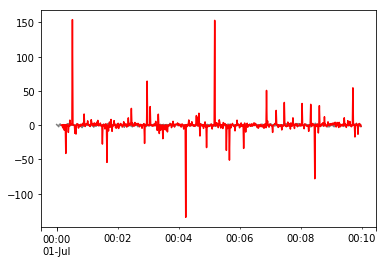

In [41]:
df['A'].plot(color = 'grey')
df.rolling(window = 10 ,center = False)['A'].apply(lambda x: x[1]/x[2]).plot(
color = 'red')

## Expanding the window functions:

In [42]:
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C
2016-07-01 00:00:01,0.439593,-0.173430,-1.498655
2016-07-01 00:00:02,0.163137,-0.567784,-0.977082
2016-07-01 00:00:03,-0.218963,-0.775928,-0.106536
2016-07-01 00:00:04,-0.631757,-0.492250,-0.229107


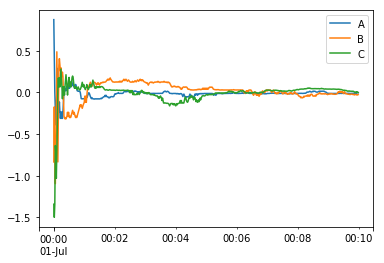

In [44]:
df.expanding(min_periods = 1).median().plot()

## Exponential moving average:


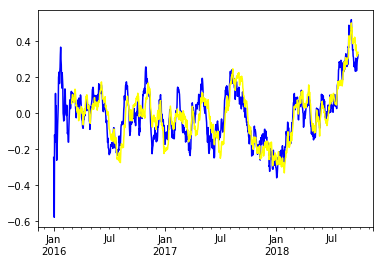

In [48]:
ts = pd.Series(np.random.randn(1000), index = pd.date_range(start = '1/1/16', 
             periods = 1000))
ts.ewm(span = 60, freq = 'D', min_periods = 0, adjust = True).mean().plot(color = 'blue')
ts.rolling(window = 60).mean().plot(color = 'yellow')

In [50]:
# replace .5 quantile function for a moving average

r = df.rolling(window = 20)
r.apply(lambda x: sorted(x)[round(len(x)*.5)])


,A,B,C
2016-07-01 00:00:00,NaN,NaN,NaN
2016-07-01 00:00:01,NaN,NaN,NaN
2016-07-01 00:00:02,NaN,NaN,NaN
2016-07-01 00:00:03,NaN,NaN,NaN
2016-07-01 00:00:04,NaN,NaN,NaN
2016-07-01 00:00:05,NaN,NaN,NaN
2016-07-01 00:00:06,NaN,NaN,NaN
2016-07-01 00:00:07,NaN,NaN,NaN
2016-07-01 00:00:08,NaN,NaN,NaN
2016-07-01 00:00:09,NaN,NaN,NaN


In [52]:
## using the multiple agg function 

r = df.rolling(window = 20)
r.agg(['sum','mean','median'])[20:30]

A                             B            \
                          sum      mean    median       sum      mean   
2016-07-01 00:00:20 -4.308654 -0.215433 -0.114495 -3.784943 -0.189247   
2016-07-01 00:00:21 -2.618381 -0.130919 -0.107623 -7.558280 -0.377914   
2016-07-01 00:00:22 -1.079641 -0.053982  0.048950 -7.069857 -0.353493   
2016-07-01 00:00:23  2.422585  0.121129  0.116606 -5.547294 -0.277365   
2016-07-01 00:00:24  4.719391  0.235970  0.116606 -6.887727 -0.344386   
2016-07-01 00:00:25  4.261301  0.213065  0.095726 -6.802581 -0.340129   
2016-07-01 00:00:26  3.257513  0.162876  0.095726 -8.094446 -0.404722   
2016-07-01 00:00:27  0.591267  0.029563  0.048950 -4.502622 -0.225131   
2016-07-01 00:00:28  1.727442  0.086372  0.095726 -3.844265 -0.192213   
2016-07-01 00:00:29  2.125512  0.106276  0.095726 -3.775795 -0.188790   

                                      C                      
                       median       sum      mean    median  
2016-07-01 00:00:20 -0.047899  3.065285  0.153264  0.139311  
2016-07-01 00:00:21 -0.301500  4.559512  0.227976  0.139311  
2016-07-01 00:00:22 -0.301500  4.896165  0.244808  0.246545  
2016-07-01 00:00:23 -0.081665  2.737770  0.136889  0.246545  
2016-07-01 00:00:24 -0.301500  4.202454  0.210123  0.298157  
2016-07-01 00:00:25 -0.301500  5.607460  0.280373  0.298157  
2016-07-01 00:00:26 -0.301500  4.316581  0.215829  0.246545  
2016-07-01 00:00:27 -0.238387  3.544636  0.177232  0.041469  
2016-07-01 00:00:28 -0.238387  4.317596  0.215880  0.041469  
2016-07-01 00:00:29 -0.238387  4.315524  0.215776  0.041469